<a href="https://colab.research.google.com/github/ErikZA/Adventch-cliente/blob/master/appSus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set dependencies
import requests  # Importing requests module to make API calls
from requests.auth import HTTPBasicAuth  # Importing HTTPBasicAuth module for basic authentication 
import pandas as pd  # Importing pandas for data manipulation and analysis
import json  # Importing json module to work with json data format
import matplotlib.pyplot as plt  # Importing matplotlib to plot graphs and charts

In [ ]:
# Set dependencies
import requests 
from requests.auth import HTTPBasicAuth
import pandas as pd
import json
import matplotlib.pyplot as plt

This code defines a function `getValidSize()` which is used to retrieve a valid size to fetch data from an API. The function prompts the user to input a size (in the form of an integer) and validates that it is greater than or equal to 10000. If the user inputs an invalid size, the function recursively calls itself until a valid size is inputted. If the size is greater than or equal to 1000000, the function prompts the user to confirm that they want to continue with the request, as the request will take a long time to complete. The function returns the validated size as an integer.

In [ ]:
# get a valid size to fetch data from api (min 10000)
def getValidSize():
    size = input('Size to fetch data from api (min 10000): ')
    if not size.isdigit():
        print('The size must be a number')
        return getValidSize()
    if int(size) < 10000:
        print('The size must be greater than 10000')
        return getValidSize()
    else:
        if int(size) >= 1000000:
            print('The size is too big, the request will take a long time to complete')
            isOk = input('Do you want to continue? (y/n): ').lower()
            if isOk == 'y':
                return size
            else:
                return getValidSize()
        return int(size)

This code defines a list of valid Brazilian states (ufs) and a function called "getValidUF()" that prompts the user to input a state abbreviation (UF) to filter the data. 

The function checks whether the inputted string is a valid two-letter abbreviation for a Brazilian state. If the input is not two letters, the function prints a message stating that the input is invalid and calls itself again to prompt the user for a new input. If the input is two letters, the function checks if it is in the list of valid state abbreviations (ufs). If the input is not in the list, the function prints a message stating that the input is not valid and calls itself again to prompt the user for a new input. If the input is valid, the function returns the inputted string in uppercase format.

In [ ]:
ufs = ['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO']

# def function to get a valid UF state to filter the data
def getValidUF():
    uf = input('UF state to filter the data: ').upper()
    if len(uf) != 2:
        print('The UF state must have 2 characters')
        return getValidUF()
    if uf not in ufs:
        print('The UF state is not valid')
        return getValidUF()
    else:
        return uf 

This function checks whether there is more data to fetch from a data source by checking if the length of the data is greater than zero. It returns a boolean value of True if there is more data to fetch, and False if there is no more data to fetch.

In [ ]:
# def function to validate if is there more data do fetch
def checkDataSize(data):
  return len(data) > 0

This function extends the `vc_store` list with the data from `vcData`. The `vc_store` list is used to store the fetched data from the API. The function uses the `extend()` method to add all elements from `vcData` to the end of the `vc_store` list.

In [ ]:
# def function to store data from api
def storeDataFromApi(vc_store, vcData):
  vc_store.extend(vcData)

This function takes the response data from an Elasticsearch API call and extracts the vaccination data from it. The data is returned as a tuple containing the vaccination data and a pagination ID. The pagination ID is used to fetch the next set of data in the API call.

In [ ]:
# def function to get all data from api and store it
def getDataFromApi(resData):
  vacinasOpt = resData.json()
  paginationId = vacinasOpt['_scroll_id']
  vacinasData = vacinasOpt['hits']['hits']
  return (vacinasData, paginationId)

This code defines a function named `getVaccinesWithScroll` that takes a `scrollId` parameter as input. It uses this parameter to make a POST request to an API endpoint by passing the `scroll_id` and `scroll` parameters in the request payload. The response from the API is then returned. 

It is likely that the API uses pagination to return large amounts of data, and this function is being used to fetch the data in batches using the scroll API.

In [ ]:
# def function to fetch data with pagination
def getVaccinesWithScroll(scrollId):
  data = { "scroll_id": scrollId, "scroll": "1m" }
  responseOpt = requests.post(url+nextPageParam, headers=headers, auth=auth, data=json.dumps(data))
  return responseOpt

This code block sets up the request parameters to make an API call to the Brazilian Ministry of Health's vaccination data system. 

- `url` is the base URL for the API.
- `firstPageParam` is a parameter added to the URL to request the first page of data.
- `nextPageParam` is a parameter added to the URL to request subsequent pages of data.
- `headers` specifies the format of the data that will be sent and received by the API.
- `auth` provides the authentication credentials required to access the API.
- `data` specifies the number of records to fetch from the API at a time. Here, it is set to 10,000.

In [ ]:
# Set up the request parameters
url = 'https://imunizacao-es.saude.gov.br/'
firstPageParam = '_search?scroll=1m'
nextPageParam = '_search/scroll'
headers = {'Content-Type': 'application/json'}
auth = HTTPBasicAuth('imunizacao_public', 'qlto5t&7r_@+#Tlstigi')
data = {'size': 10000}

This code initializes two variables: `data_store` and `pageId` with empty values. `data_store` is used to store the data that will be fetched from the API and `pageId` will be used to store the pagination ID, which is used to fetch the next batch of data.

In [ ]:
# store data, pageId and parans
data_store = []
pageId = ""

get values in `sapleSize` and`sampleSize`.


In [ ]:
# paras of the search
sapleSize = getValidSize()
filterState = getValidUF() 
    

Size to fetch data from api (min 10000): 100000
UF state to filter the data: PR


The code is making an HTTP POST request to the specified URL with the given headers and authentication credentials. The data being sent is in JSON format and contains a parameter "size" with a value of 10000. The response from the server is being stored in the "response" variable.

In [ ]:
# Send the request using HTTP Basic Auth
response = requests.post(url+firstPageParam, headers=headers, auth=auth, data=json.dumps(data))

The above code snippet sends a HTTP POST request to a given URL with HTTP Basic Authentication and specified headers and data. It uses the `requests` package in Python. The response is stored in the `response` variable.

After that, the code retrieves data from the first page using the `getDataFromApi` function and stores it in the `data_store` variable. The `pageId` variable is also updated with the value of the `paginationId` variable.

In [ ]:
# get data form the first page
currentData, paginationId = getDataFromApi(response)
pageId = paginationId
data_store.extend(currentData)

This code creates a loop that fetches data from a RESTful API with pagination until either the data store has reached a certain size or there is no more data to fetch. The code first fetches data from the API's first page and stores it in `data_store`. The variable `pageId` is set to the pagination ID of the first page. The loop then sends subsequent requests to the API with the pagination ID in order to fetch more data, and the new data is appended to `data_store`. The loop continues until either there is no more data to fetch or `data_store` has reached a certain size (`sapleSize`).

In [ ]:
if len(currentData) > 0:
  while True:
    dataOpt = getVaccinesWithScroll(pageId)
    currentData, paginationId = getDataFromApi(dataOpt)
    pageId = paginationId
    data_store.extend(currentData)
    if checkDataSize(currentData) == False or len(data_store) >= sapleSize:
      break
    else:
      continue

`pd.json_normalize()` is a function from the pandas library that converts semi-structured JSON data into a pandas DataFrame. In this specific case, it takes `data_store` (which contains the vaccine data obtained from the API) as input and creates a tabular data structure that can be easily analyzed and manipulated. The resulting DataFrame (`df_vacinasOpt`) contains all the data stored in `data_store`, with each row representing a vaccine record and each column representing a specific data attribute (e.g., patient name, vaccine type, date of vaccination, etc.).

In [ ]:
#create a data frame with pandas
df_vacinasOpt = pd.json_normalize(data_store)

Great job! Collected data from the API, stored it in a Pandas DataFrame, and cleaned and preprocessed the data.


In [ ]:
# clean data and drop columns that are not necessary for the analysis and drop rows with null values in the data frame
df_vacinasOpt.drop(
    columns=['_id', '_index', '_score', '_type'], inplace=True)

df_vacinasOpt.drop(
    columns=[
        '_source.ds_condicao_maternal',
        '_source.estabelecimento_valor',
        '_source.estabelecimento_municipio_codigo',
        '_source.paciente_nacionalidade_enumNacionalidade',
        '_source.paciente_endereco_coPais',
        '_source.paciente_endereco_coIbgeMunicipio',
        '_source.vacina_fabricante_referencia',
        '_source.co_condicao_maternal',
        '_source.paciente_endereco_cep',
        '_source.paciente_endereco_nmPais',
        '_source.vacina_categoria_codigo',
        '_source.vacina_lote',
        '_source.paciente_id',
        '_source.paciente_racaCor_valor',
        '_source.paciente_racaCor_codigo',
        '_source.sistema_origem',
        '_source.id_sistema_origem',
        '_source.data_importacao_datalake',
        '_source.data_importacao_rnds',
        '_source.dt_deleted',
        '_source.document_id',
        '_source.@timestamp',
        '_source.estalecimento_noFantasia',
        '_source.@version',
        '_source.status'], inplace=True)

df_vacinasOpt.dropna(axis=1, how='all', inplace=True)
df_vacinasOpt.dropna(axis=0, how='any', inplace=True)

# rename columns
df_vacinasOpt.rename(columns={
    '_source.paciente_idade': 'idade',
    '_source.paciente_enumSexoBiologico': 'sexo',
    '_source.paciente_endereco_nmMunicipio': 'municipio',
    '_source.paciente_endereco_uf': 'estado paciente',
    '_source.vacina_dataAplicacao': 'data aplicacao',
    '_source.vacina_nome': 'vacina',
    '_source.vacina_categoria_nome': 'categoria',
    '_source.vacina_fabricante_nome': 'fabricante',
    '_source.vacina_grupoAtendimento_nome': 'grupo',
    '_source.vacina_descricao_dose': 'dose',
    '_source.vacina_codigo': 'codigo vacina',
    '_source.estabelecimento_uf': 'estado',
    '_source.estabelecimento_municipio_nome': 'municipio',
    '_source.estabelecimento_razaoSocial': 'razao social',
    '_source.paciente_dataNascimento': 'data nascimento',
    '_source.vacina_grupoAtendimento_codigo': 'codigo grupo',
    '_source.vacina_numDose': 'numero dose',
}, inplace=True)


To display the information about the dataframe, you can use the `info()` method of pandas DataFrame. This will print the column names, number of non-null values, and data types of each column in the dataframe.

In [ ]:
df_vacinasOpt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97620 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   grupo            97620 non-null  object 
 1   codigo vacina    97620 non-null  object 
 2   data nascimento  97620 non-null  object 
 3   estado paciente  97620 non-null  object 
 4   idade            97620 non-null  float64
 5   sexo             97620 non-null  object 
 6   municipio        97620 non-null  object 
 7   codigo grupo     97620 non-null  object 
 8   dose             97620 non-null  object 
 9   municipio        97620 non-null  object 
 10  categoria        97620 non-null  object 
 11  fabricante       97620 non-null  object 
 12  numero dose      97620 non-null  object 
 13  razao social     97620 non-null  object 
 14  vacina           97620 non-null  object 
 15  estado           97620 non-null  object 
 16  data aplicacao   97620 non-null  object 
dtypes: float64(1

This code groups the data in the data frame by state and vaccine type, and counts the number of occurrences of each combination of state and vaccine. Then, it creates a stacked bar chart with the data, where each bar represents a state and the height of each segment represents the number of occurrences of each vaccine type in that state. The x-axis shows the states, and the y-axis shows the number of vaccines. Finally, the code adds labels and a title to the plot, and shows it on the screen.

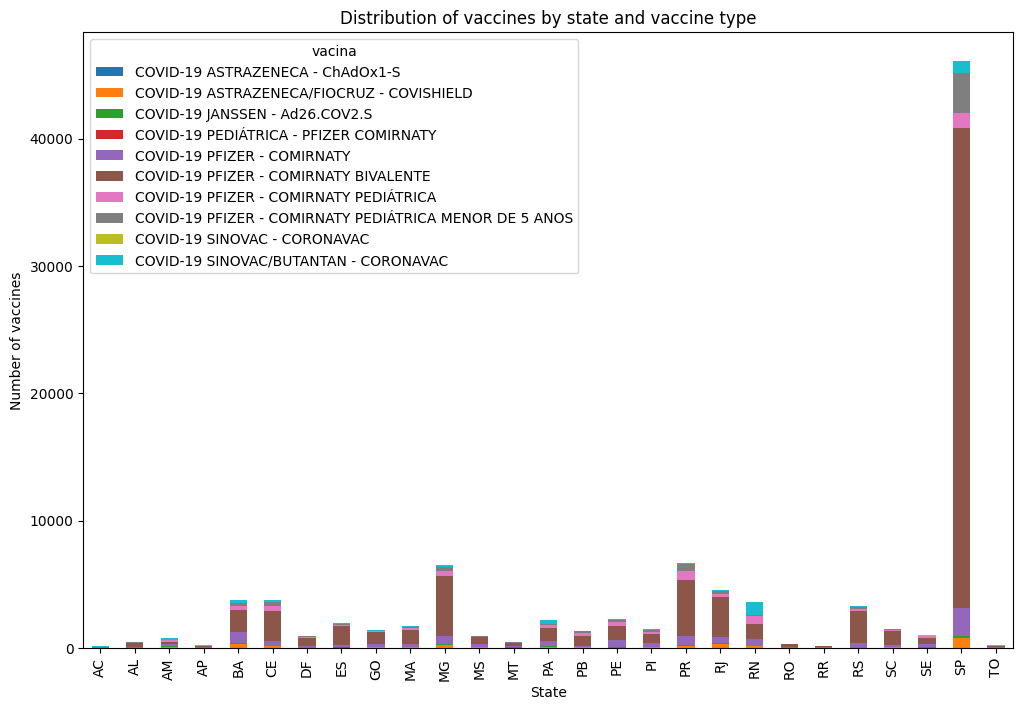

In [ ]:
# Group by state and vaccine type, and count the number of occurrences
counts = df_vacinasOpt.groupby(['estado', 'vacina']).size().unstack()

# Plot a stacked bar chart
counts.plot(kind='bar', stacked=True, figsize=(12, 8))

# Add labels and title
plt.xlabel('State')
plt.ylabel('Number of vaccines')
plt.title('Distribution of vaccines by state and vaccine type')

# Show the plot
plt.show()

This code filters the `df_vacinasOpt` data frame to get the data only for a specific state (`filterState`) which is previously defined. Then, it groups the data by vaccine type and calculates the sum of doses for each vaccine. Finally, it plots a stacked bar chart to show the distribution of vaccines for the selected state. The x-axis represents the vaccine type, and the y-axis represents the number of doses. The title of the plot includes the selected state, and the x and y labels provide additional information about the plot.

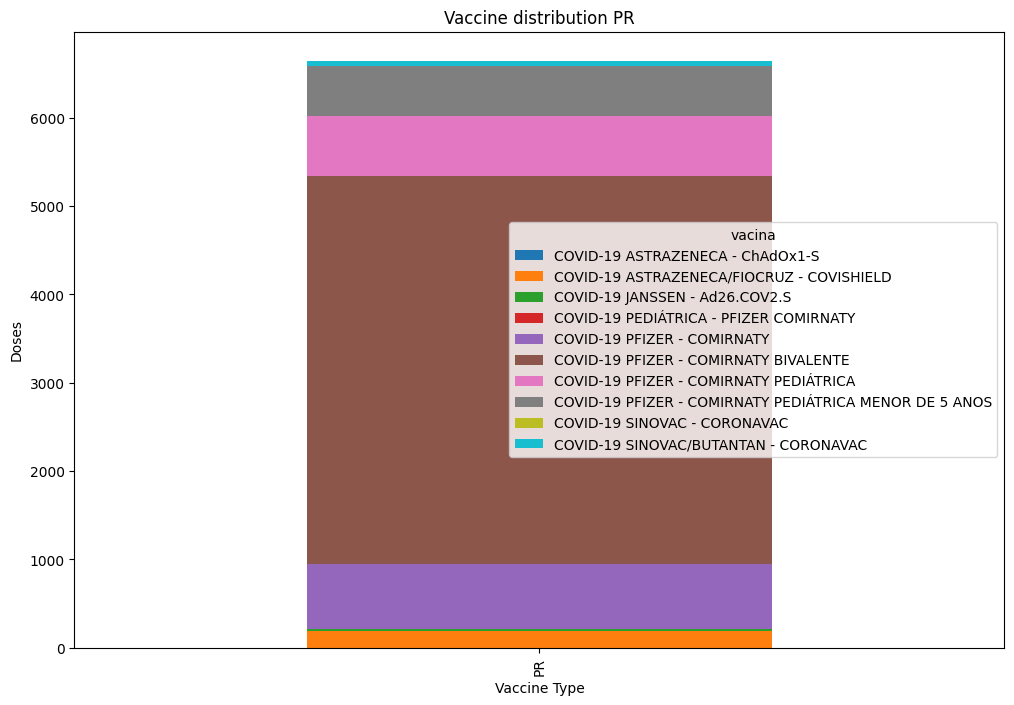

In [ ]:
# Filter data for São Paulo state
df_stateFilter = df_vacinasOpt[df_vacinasOpt['estado'] == filterState]

# Group data by vaccine type and sum the doses
vaccine_counts = df_stateFilter.groupby(['estado', 'vacina']).size().unstack()
vaccine_counts.plot(kind='bar', stacked=True, figsize=(12, 8))

# Plot bar chart
plt.title('Vaccine distribution ' + filterState)
plt.xlabel('Vaccine Type')
plt.ylabel('Doses')
plt.xticks(rotation=90)
plt.show()

This code filters the vaccine data to get the distribution of vaccines used in the specified state (set by the `filterState` variable). It then groups the data by vaccine type and creates a stacked bar chart of the total doses administered for each vaccine type. 

The next section groups the vaccine data by type and calculates the percentage of doses administered for each vaccine. If a vaccine accounts for less than 5% of the total doses administered, it is grouped into an "Others" category. The code then creates a pie chart to display the distribution of vaccine brands used.

1.0
0.0


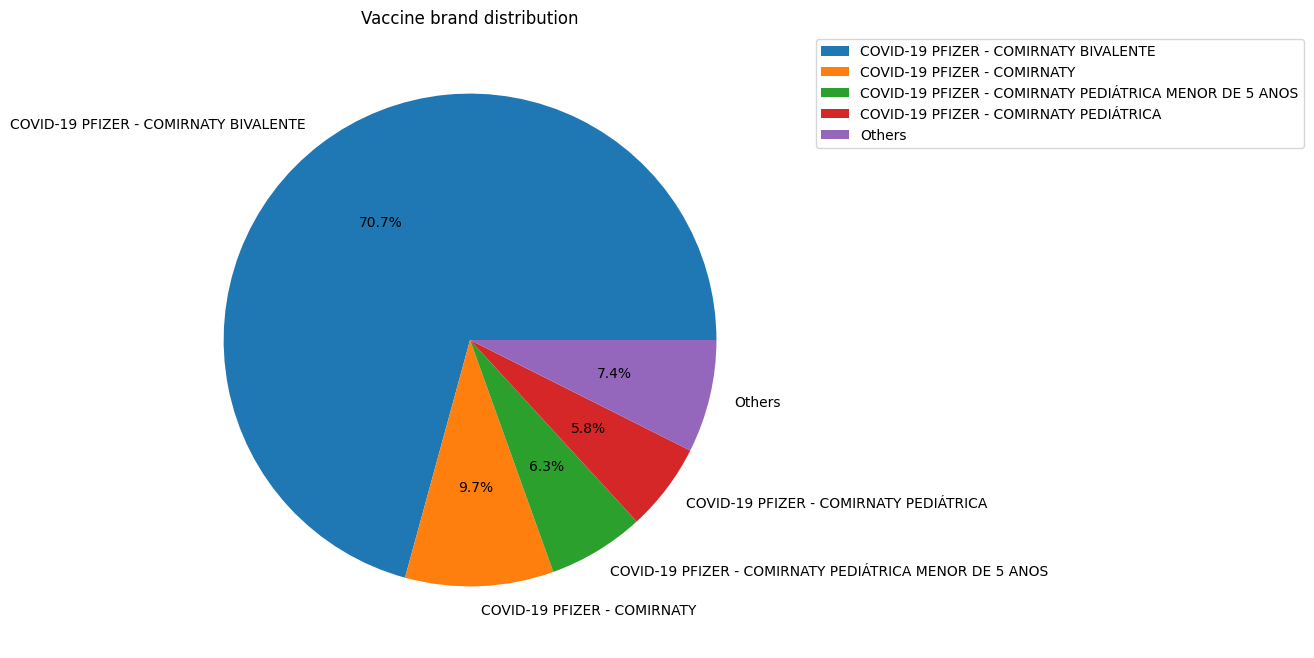

In [ ]:
# Group values less than 5% and name them "Others"
vaccine_counts = df_vacinasOpt['vacina'].value_counts(normalize=True)
vaccine_counts = vaccine_counts[vaccine_counts >= 0.05]
vaccine_counts['Others'] = 1 - vaccine_counts.sum()
print(vaccine_counts.sum())
print(1 - vaccine_counts.sum())
# Create a pie chart with a legend on the side
plt.figure(figsize=(8, 8))
plt.pie(vaccine_counts, labels=vaccine_counts.index, autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Vaccine brand distribution')
plt.show()

Group and display only vaccines from other categories grouped in the previous block.

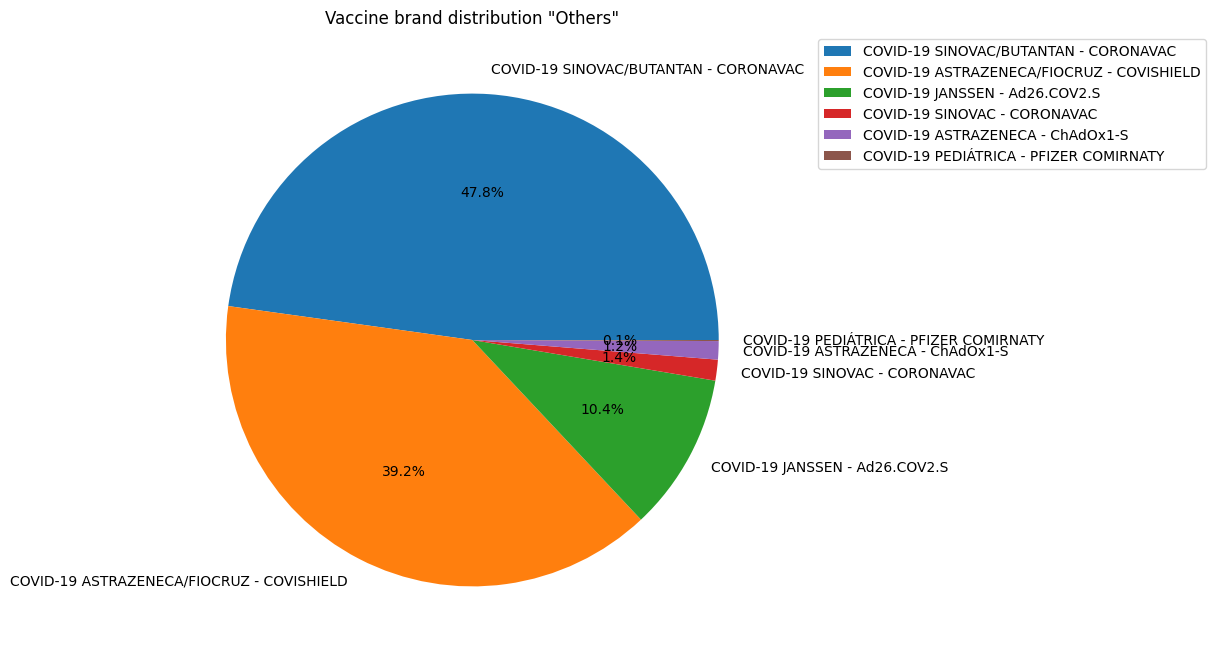

In [ ]:
# Group values less than 5% show them in the pie chart
vaccine_counts = df_vacinasOpt['vacina'].value_counts(normalize=True)
vaccine_counts = vaccine_counts[vaccine_counts < 0.05]


# Create a pie chart with a legend on the side
plt.figure(figsize=(8, 8))
plt.pie(vaccine_counts, labels=vaccine_counts.index, autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Vaccine brand distribution "Others"')
plt.show()